<a href="https://colab.research.google.com/github/VitorSRamos/CNN-MorfGal/blob/main/exemplos%20de%20treinamento/EN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação

## Módulos

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.applications.efficientnet import EfficientNetB2
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint

In [ ]:
os.environ['PYTHONHASHSEED'] = '12'
np.random.seed(123)
random.seed(1234)
tf.random.set_seed(12345)

## Dados

In [ ]:
folder_path = '/content/drive/MyDrive/.../png_data/'

filenames = os.listdir(folder_path) # Crio lista com nomes de arquivos na pasta de imagens

# Carregando as imagens para uma lista de tensores. É possível normalizar os tensores usando "Rescaled_image = np.array(Resized_image)/255" dentro do loop
Input_images = []
for image in filenames:
  # carregando imagens na resolução desejada 
  Resized_image  = tf.keras.preprocessing.image.load_img(folder_path+image, target_size=(256,256))
  # Transformando em array do numpy e normalizando
  array_image = np.array(Resized_image)/255
  # Guardando a imagem na lista
  Input_images.append(array_image)

In [ ]:
# Nova lista retirando o '.png' do final dos nomes dos arquivos
labels = [filename[:-4] for filename in filenames]
print(labels[0])
len(labels)

# Pegando itens que dão erro (rótulo duplo)
error_idx = []
counter = 0
for item in labels:
    if item[-1] == item[-3]:
        error_idx.append(counter)
    counter += 1
print('Houveram {} erros'.format(len(error_idx)))

# Corrigindo erros:
error_idx.sort(reverse=True) # fazendo do maior índice pro menor para evitar mudanças de índice
for item in error_idx:
    labels.pop(item)
    filenames.pop(item)
    Input_images.pop(item)

# Checando a existencia de erros após correção
new_error_idx = []
new_counter = 0
for item in labels:
    if item[-1] == item[-3]:
        new_error_idx.append(new_counter)
    new_counter += 1
print('Houveram {} erros'.format(len(new_error_idx)))

SPLUS.STRIPE82-0126.18742.grizE0S1
Houveram 103 erros
Houveram 0 erros


In [ ]:
print(labels)

['SPLUS.STRIPE82-0126.18742.grizE0S1', 'SPLUS.STRIPE82-0126.19641.grizE0S1', 'SPLUS.STRIPE82-0126.20630.grizE1S0', 'SPLUS.STRIPE82-0126.21154.grizE1S0', 'SPLUS.STRIPE82-0127.04570.grizE0S1', 'SPLUS.STRIPE82-0127.06016.grizE0S1', 'SPLUS.STRIPE82-0127.06200.grizE0S1', 'SPLUS.STRIPE82-0127.11789.grizE1S0', 'SPLUS.STRIPE82-0127.13029.grizE0S1', 'SPLUS.STRIPE82-0127.13404.grizE0S1', 'SPLUS.STRIPE82-0127.21480.grizE1S0', 'SPLUS.STRIPE82-0127.28903.grizE0S1', 'SPLUS.STRIPE82-0127.29912.grizE1S0', 'SPLUS.STRIPE82-0127.31173.grizE1S0', 'SPLUS.STRIPE82-0128.03530.grizE1S0', 'SPLUS.STRIPE82-0128.04660.grizE1S0', 'SPLUS.STRIPE82-0128.06458.grizE1S0', 'SPLUS.STRIPE82-0128.11789.grizE0S1', 'SPLUS.STRIPE82-0128.13060.grizE0S1', 'SPLUS.STRIPE82-0128.14110.grizE0S1', 'SPLUS.STRIPE82-0128.18755.grizE1S0', 'SPLUS.STRIPE82-0128.20018.grizE1S0', 'SPLUS.STRIPE82-0128.20205.grizE0S1', 'SPLUS.STRIPE82-0128.28164.grizE1S0', 'SPLUS.STRIPE82-0128.41370.grizE0S1', 'SPLUS.STRIPE82-0128.45376.grizE0S1', 'SPLUS.STRI

In [ ]:
def get_label_list(file_list):
    label_list = []
    for item in file_list:
        if item[-1] == item[-3]:
            print('Erro')
            break
        elif item[-1] == '1': # Spiral

            label_list.append(0)
        elif item[-3] == '1': # Elliptical
            label_list.append(1)
        return label_list

In [ ]:
num_labels = [] # Spiral 0, Elliptical 1

for item in labels:
    if item[-1] == '1':
        num_labels.append(0)
    else:
        num_labels.append(1)
        
print(num_labels)
print(len(num_labels))
print(num_labels.count(1))
print(num_labels.count(0))

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 

# Verificações e limpeza

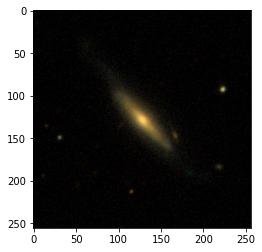

In [ ]:
plt.imshow(Input_images[2000])

In [ ]:
print('A lista de imagens tem {} imagens'.format(len(Input_images)))

print('A lista de labels tem {} labels,'.format(len(num_labels)))

print('dos quais {} são espirais, {} elípticos e {} incertos'.format(num_labels.count(0), num_labels.count(1), num_labels.count(2)))

A lista de imagens tem 4129 imagens
A lista de labels tem 4129 labels,
dos quais 2906 são espirais, 1223 elípticos e 0 incertos


É necessário limpar os valores incertos para fazer uma classificação binária. Além disso, para manetar a simplicidade, a classificação simples, o conjunto de imagens será balanceado. Primeiro excluindo os incertos:

In [ ]:
unc_idx = [] # Crio uma lista com índices de incertos

idx=0
for label in num_labels: # Loop para procurar índices 2 (incertos) na lista num_labels
    if label == 2:
        unc_idx.append(idx)
    idx += 1

unc_idx.sort(reverse=True) # reverto a ordem da lista para evitar problemas com mudanças de índice após pop

for index in unc_idx: # Loop que retira os objetos incertos da lista
    num_labels.pop(index)
    Input_images.pop(index)

Agora balanceando o conjunto de dados:

In [ ]:
while num_labels.count(0) != num_labels.count(1): 
    
    pop_idx = random.randint(0, len(num_labels)-1) # Gero índice aleatório de num_labels e caso seja 0 (espiral), removo das duas listas
    
    if num_labels[pop_idx] == 0:
        Input_images.pop(pop_idx)
        num_labels.pop(pop_idx)

In [ ]:
print('A lista de imagens tem {} imagens'.format(len(Input_images)))

print('A lista de labels tem {} labels,'.format(len(num_labels)))

print('dos quais {} são espirais, {} elípticos e {} incertos'.format(num_labels.count(0), num_labels.count(1), num_labels.count(2)))

A lista de imagens tem 2446 imagens
A lista de labels tem 2446 labels,
dos quais 1223 são espirais, 1223 elípticos e 0 incertos


# Pré-processamento

In [ ]:
print(len(Input_images))
len(num_labels)

2446


2446

In [ ]:
# transformando listas em arrays e verificando shapes
X = np.array(Input_images)
Y = np.array(num_labels)

del Input_images
del num_labels

# Separando em treinamento, validação e teste
x_train, x_val , y_train, y_val = train_test_split(X, Y, test_size=.3, stratify = Y) # 70% treinamento, 30% validação, que ainda será dividida para teste
x_val, x_test , y_val, y_test = train_test_split(x_val, y_val, test_size=1/3, stratify = y_val) # 2/3 (20% do total) para validação, 1/3 (10% do total) para teste

del X
del Y

# Aplicando One Hot Encoding aos labels
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

# Criando Gerador de Augmentation
train_generator = ImageDataGenerator(rotation_range = 180, horizontal_flip = True, vertical_flip = True )
train_generator.fit(x_train)

In [ ]:
# verificando dimensões
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)


((1712, 256, 256, 3), (1712, 2))
((489, 256, 256, 3), (489, 2))
((245, 256, 256, 3), (245, 2))


# Definição da Arquitetura

In [ ]:
ENB2 = EfficientNetB2(include_top=False, weights=None, input_tensor=None, input_shape=x_train[0].shape, pooling=None, classes=y_train.shape[1], classifier_activation='softmax')

In [ ]:
My_Model = Sequential()

My_Model.add(ENB2) 

My_Model.add(Flatten()) 

My_Model.add(Dropout(.5))

My_Model.add(Dense(256,activation=('relu')))

My_Model.add(Dense(2,activation=('softmax'))) 

My_Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['binary_accuracy'])

#Checking the final My_Model summary
My_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 8, 8, 1408)       7768569   
                                                                 
 flatten (Flatten)           (None, 90112)             0         
                                                                 
 dropout (Dropout)           (None, 90112)             0         
                                                                 
 dense (Dense)               (None, 256)               23068928  
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 30,838,011
Trainable params: 30,770,436
Non-trainable params: 67,575
_________________________________________________________________


In [ ]:
# Definição do callback do checkpoint
filepath = 'my_best_model'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_binary_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
# Fitting the model
My_Model_Fit = My_Model.fit(train_generator.flow(x_train, y_train, batch_size = 50), validation_data=(x_val, y_val), epochs=80, batch_size=50, verbose=0, callbacks=[TqdmCallback(verbose=0), checkpoint])

0epoch [00:00, ?epoch/s]


Epoch 1: val_binary_accuracy improved from -inf to 0.50102, saving model to my_best_model
INFO:tensorflow:Assets written to: my_best_model/assets

Epoch 2: val_binary_accuracy did not improve from 0.50102

Epoch 3: val_binary_accuracy did not improve from 0.50102

Epoch 4: val_binary_accuracy did not improve from 0.50102

Epoch 5: val_binary_accuracy did not improve from 0.50102

Epoch 6: val_binary_accuracy did not improve from 0.50102

Epoch 7: val_binary_accuracy did not improve from 0.50102

Epoch 8: val_binary_accuracy did not improve from 0.50102

Epoch 9: val_binary_accuracy did not improve from 0.50102

Epoch 10: val_binary_accuracy did not improve from 0.50102

Epoch 11: val_binary_accuracy did not improve from 0.50102

Epoch 12: val_binary_accuracy did not improve from 0.50102

Epoch 13: val_binary_accuracy did not improve from 0.50102

Epoch 14: val_binary_accuracy improved from 0.50102 to 0.50307, saving model to my_best_model
INFO:tensorflow:Assets written to: my_best_mod

# Avaliação


O conjunto de labels de teste original é y_test. O OHE é aplicado sobre este conjunto mesmo, então para obter o conjunto ordinal original é preciso usar argmax.

In [ ]:
print(y_test[10:20])
y_true=np.argmax(y_test,axis=1)
print(y_true[10:20])

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1 0 1 1 0 0 0 1 1 1]


O Conjunto de predições é obtido aplicando o modelo a x_test

In [ ]:
predictions = My_Model.predict(x_test)
y_pred = [np.argmax(item) for item in predictions]
y_pred = np.array(y_pred)
print(predictions[10:20])
print(y_pred[10:20])

[[9.9994147e-01 5.8557249e-05]
 [9.9998379e-01 1.6189311e-05]
 [3.2925934e-02 9.6707404e-01]
 [8.0566294e-02 9.1943371e-01]
 [5.4899347e-01 4.5100650e-01]
 [4.9213460e-01 5.0786543e-01]
 [1.0000000e+00 1.5426407e-09]
 [8.0410382e-03 9.9195898e-01]
 [3.0072350e-03 9.9699271e-01]
 [3.7301232e-03 9.9626982e-01]]
[0 0 1 1 0 1 0 1 1 1]


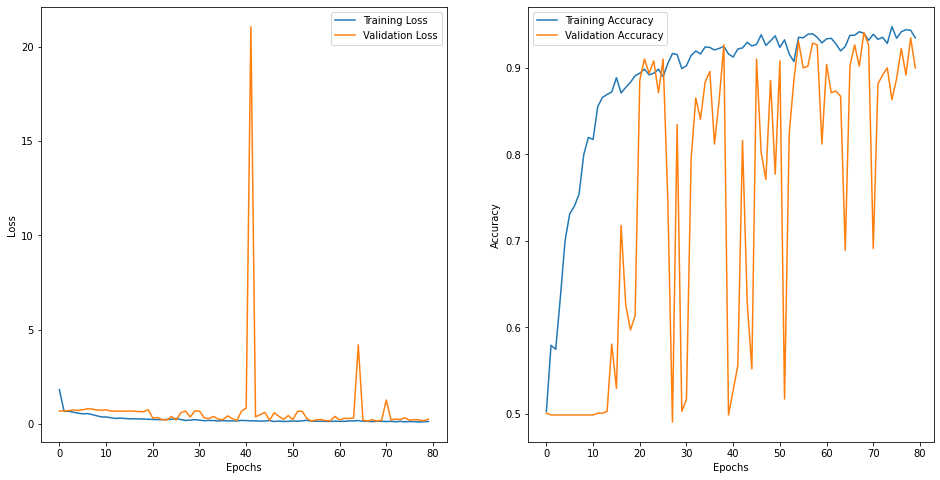

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16, 8))

ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')

ax[0].plot(My_Model_Fit.history['loss'], color='C0',label='Training Loss')
ax[0].plot(My_Model_Fit.history['val_loss'],color='C1',label='Validation Loss')
ax[0].legend()

ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')

ax[1].plot(My_Model_Fit.history['binary_accuracy'], color='C0',label='Training Accuracy')
ax[1].plot(My_Model_Fit.history['val_binary_accuracy'],color='C1',label='Validation Accuracy')
ax[1].legend()

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


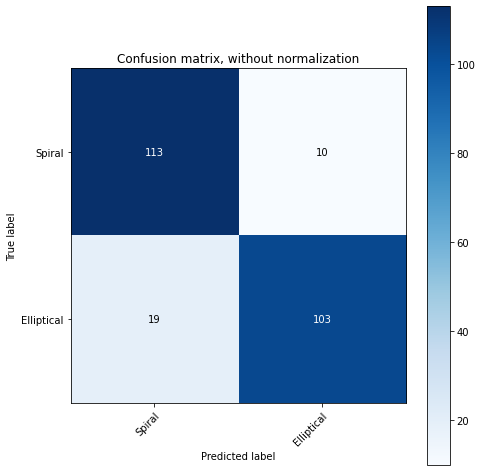

In [ ]:
predictions = My_Model.predict(x_test)

y_pred = [np.argmax(item) for item in predictions]
y_pred = np.array(y_pred)

y_true=np.argmax(y_test,axis=1)

from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['Spiral', 'Elliptical']

plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

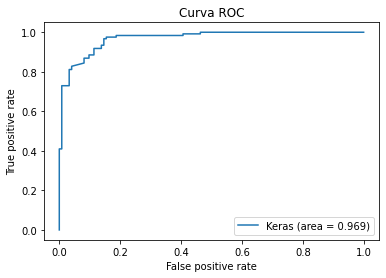

In [ ]:
from sklearn.metrics import roc_curve 
my_fpr, my_tpr, my_thresholds = roc_curve(y_true, predictions[:, 1])

from sklearn.metrics import auc
auc = auc(my_fpr, my_tpr)

fig, ax = plt.subplots()

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC')
plt.plot(my_fpr, my_tpr, label='Keras (area = {:.3f})'.format(auc))
plt.legend(loc='best')

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.8816326530612245


# Avaliação com melhor modelo


In [ ]:
best_model = tf.keras.models.load_model('my_best_model')

O conjunto de labels de teste original é y_test. O OHE é aplicado sobre este conjunto mesmo, então para obter o conjunto ordinal original é preciso usar argmax.

O Conjunto de predições é obtido aplicando o modelo a x_test

Confusion matrix, without normalization


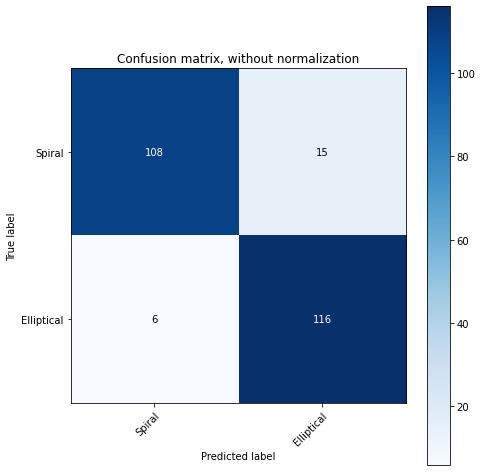

In [ ]:
best_predictions = best_model.predict(x_test)

best_y_pred = [np.argmax(item) for item in best_predictions]
best_y_pred = np.array(best_y_pred)

best_y_true=np.argmax(y_test,axis=1)

from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(best_y_true,best_y_pred)

class_names=['Spiral', 'Elliptical']

plot_confusion_matrix(best_y_true, best_y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

y_score: ndarray of shape (n_samples,)

Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).

Isso significa que a função do sklearn só precisa da estimativa de probabilidade da classe positiva (probabilidade de ser classe 1, ou seja, o segundo número nos vetores OHE de predictions)

https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python?rq=1

Neste exemplo está implementado a estimativa de probabilidade da classe positiva

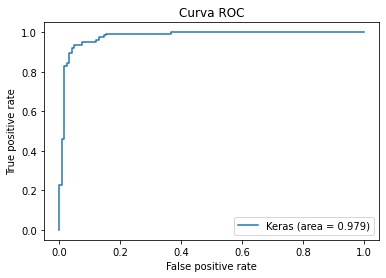

In [ ]:
from sklearn.metrics import roc_curve 
best_my_fpr, best_my_tpr, best_my_thresholds = roc_curve(best_y_true, best_predictions[:, 1])

from sklearn.metrics import auc
best_auc = auc(best_my_fpr, best_my_tpr)

fig, ax = plt.subplots()

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC')
plt.plot(best_my_fpr, best_my_tpr, label='Keras (area = {:.3f})'.format(best_auc))
plt.legend(loc='best')

In [ ]:
from sklearn.metrics import accuracy_score
best_acc_score = accuracy_score(best_y_true, best_y_pred)
print('Accuracy Score = ', best_acc_score)

Accuracy Score =  0.9142857142857143


# Salvando o modelo

In [ ]:
model_history = pd.DataFrame(data = My_Model_Fit.history)
model_history.index += 1 # Para que coluna index seja equivalente a época e comece em 1 em vez de 0

display(model_history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
1,1.831651,0.502921,0.695965,0.501023
2,0.687679,0.579439,0.701159,0.498978
3,0.679114,0.574766,0.713202,0.498978
4,0.635022,0.634930,0.751587,0.498978
5,0.582332,0.700350,0.724441,0.498978
...,...,...,...,...
76,0.138751,0.933995,0.209783,0.887526
77,0.134761,0.941589,0.242460,0.922290
78,0.112576,0.943925,0.223650,0.891616
79,0.129658,0.943341,0.174372,0.934560


In [ ]:
# Salvando último modelo
My_Model.save('/content/drive/MyDrive/.../modelos/EN-2/EN_2_80epochs')

#Salvando melhor modelo
best_model.save('/content/drive/MyDrive/.../modelos/EN-2/EN_2_best_model')

# Salvando histórico
model_history.to_csv('/content/drive/MyDrive/.../modelos/EN-2/EN_2_80epochs.csv', index=True) 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/UERJ/Iniciação Científica/Redes Neurais/Simple CNN SPLUS/models/corrigido_simple_cnn_splus_256_ENB2/corrigido_simple_cnn_splus_256_ENB2_80epochs/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/UERJ/Iniciação Científica/Redes Neurais/Simple CNN SPLUS/models/corrigido_simple_cnn_splus_256_ENB2/corrigido_simple_cnn_splus_256_ENB2_best_model/assets
